In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt


In [56]:
info_url ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/'
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df_cars = pd.read_csv(url,header=None,names=columns)



In [57]:
from sklearn.preprocessing import OrdinalEncoder
prep = OrdinalEncoder()
df_cars[['buying','lug_boot','safety','maint']] = prep.fit_transform(df_cars[['buying','lug_boot','safety','maint']])

df_cars.persons[df_cars.persons=='more'] = 5
df_cars.doors[df_cars.doors == '5more'] =5

In [58]:
X = df_cars.iloc[:,:-1].values
y = df_cars['class'].values



In [59]:
X_test,X_train,y_text,y_train = train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
sum(pred==y_text)/pred.shape[0]


0.9404466501240695

In [77]:
clf = DecisionTreeClassifier(random_state=42,criterion='entropy')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
sum(pred==y_text)/pred.shape[0]
#ehtropy gives slighly better result

0.946236559139785

In [91]:
clf = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=12)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
sum(pred==y_text)/pred.shape[0]
#max_depth , if it's less than 12, accuracy decreases, for deep values, it remains constant

0.946236559139785

In [134]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
sum(pred==y_text)/pred.shape[0]
#max_depth , if it's less than 12, accura

0.9404466501240695

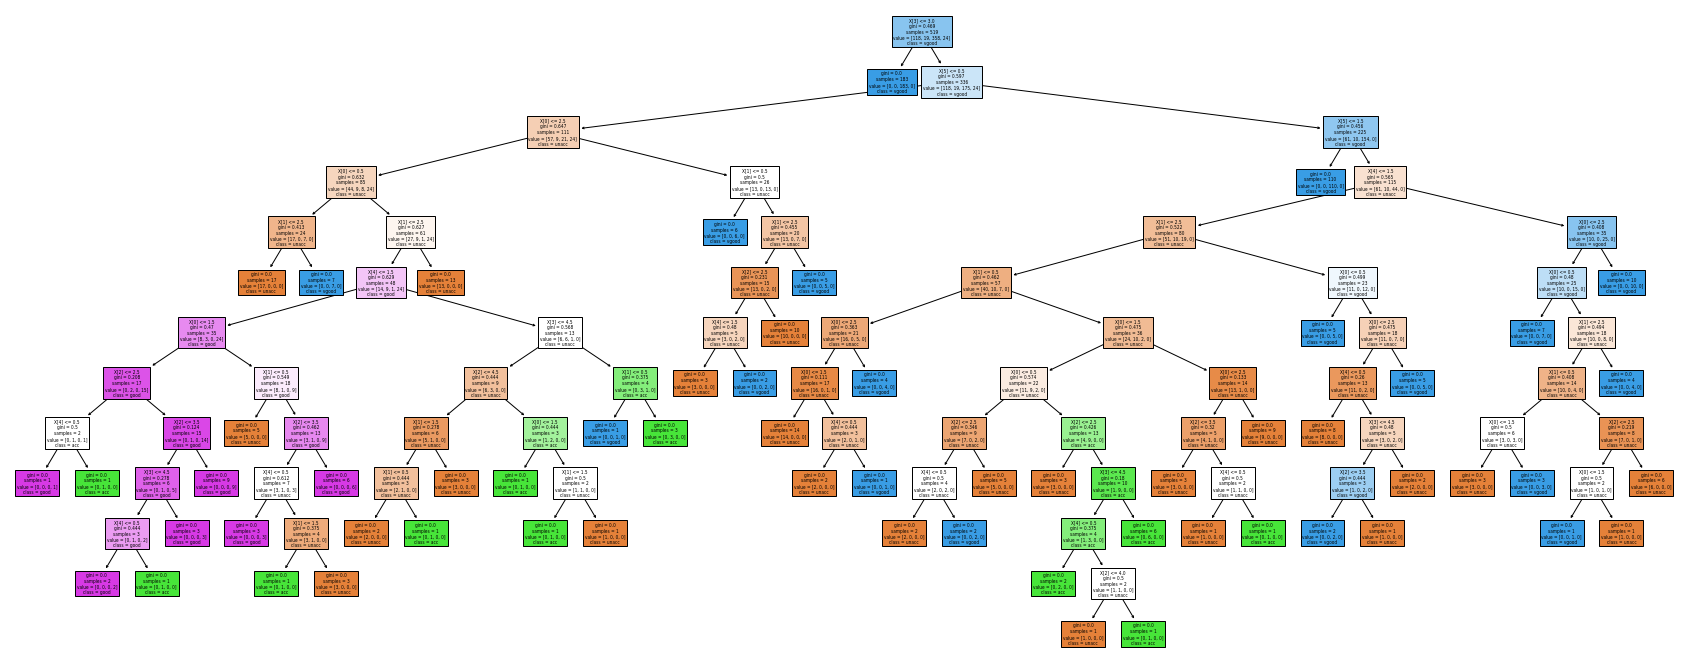

In [136]:
plt.figure(figsize=(30,12))
plot_tree(clf,filled=True,class_names=df_cars['class'].unique() )
plt.show()

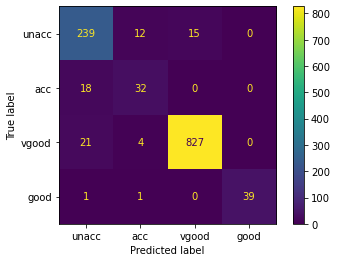

In [140]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_text,display_labels=df_cars['class'].unique())